#Stage 4 - Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Dataset_5 - Travel.csv')
data.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
data['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [ ]:
data.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [ ]:
data.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [ ]:
null=pd.DataFrame(data.isnull().sum(),columns=['Total Null Values'])
# null['%']=(data.isna().sum()/len(data)*100)
null = null[null['Total Null Values'] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) #split data train dan data test

,Total Null Values
Arrival Delay in Minutes,310


In [ ]:
data.duplicated().sum()

0

Text(0.5, 1.0, 'Departure Delay in Minutes')

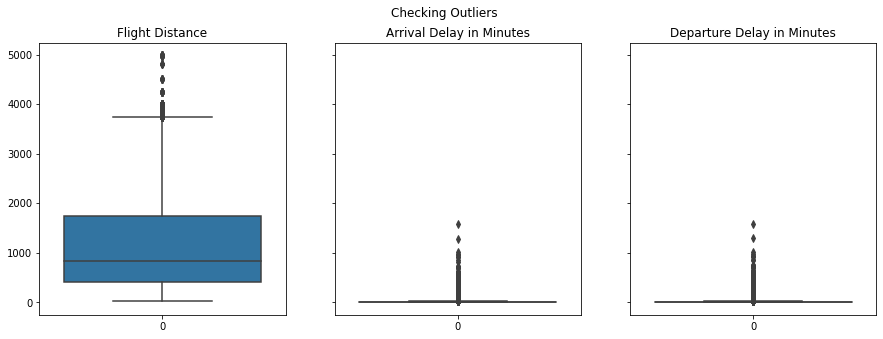

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (15,5), sharey=True)
fig.suptitle('Checking Outliers')

sns.boxplot(ax=axes[0], data=data['Flight Distance'])
axes[0].set_title('Flight Distance')

sns.boxplot(ax=axes[1], data=data['Arrival Delay in Minutes']).set_title('Arrival Delay in Minutes')
axes[1].set_title('Arrival Delay in Minutes')

sns.boxplot(ax=axes[2], data=data['Departure Delay in Minutes']).set_title('Departure Delay in Minutes')
axes[2].set_title('Departure Delay in Minutes')

In [ ]:
# print(f'Row counts before removing outlier: {len(data)}')

# filtered_entries = np.array([True] * len(data))
# Q1 = data['Flight Distance'].quantile(0.25)
# Q3 = data['Flight Distance'].quantile(0.75)
# IQR = Q3 - Q1
# low_limit = Q1 - (IQR * 1.5)
# high_limit = Q3 + (IQR * 1.5)

# filtered_entries = ((data['Flight Distance'] >= low_limit) & (data['Flight Distance'] <= high_limit)) & filtered_entries

# data = data[filtered_entries]

# print(f'Row counts after removing outlier: {len(data)}')

In [ ]:
# fig, axes = plt.subplots(1, 3, figsize = (15,5), sharey=True)
# fig.suptitle('After Handling Outliers')

# sns.boxplot(ax=axes[0], data=data['Flight Distance'])
# axes[0].set_title('Flight Distance')

# sns.boxplot(ax=axes[1], data=data['Arrival Delay in Minutes']).set_title('Arrival Delay in Minutes')
# axes[1].set_title('Arrival Delay in Minutes')

# sns.boxplot(ax=axes[2], data=data['Departure Delay in Minutes']).set_title('Departure Delay in Minutes')
# axes[2].set_title('Departure Delay in Minutes')

In [ ]:
print(f'Row counts before using Tarmac Delay Rules : {len(data)}')

data.drop(data[(data['Departure Delay in Minutes'] > 180)].index, inplace=True)
data.drop(data[(data['Arrival Delay in Minutes'] > 180)].index, inplace=True)

print(f'Row counts after using Tarmac Delay Rules : {len(data)}')

Row counts before using Tarmac Delay Rules : 103904
Row counts after using Tarmac Delay Rules : 102706


##Data Discretization

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
data['Flight Distance'] = est.fit_transform(data['Flight Distance'].values.reshape(-1,1))

In [ ]:
data[['Flight Distance']]

,Flight Distance
0,1.0
1,0.0
2,3.0
3,1.0
4,0.0
...,...
103899,0.0
103900,4.0
103901,3.0
103902,2.0


In [ ]:
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,1.0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,0.0,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,3.0,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,1.0,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,0.0,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## Feature Encoding

In [ ]:
data[['satisfaction']]

,satisfaction
0,neutral or dissatisfied
1,neutral or dissatisfied
2,satisfied
3,neutral or dissatisfied
4,satisfied
...,...
103899,neutral or dissatisfied
103900,satisfied
103901,neutral or dissatisfied
103902,neutral or dissatisfied


In [ ]:
data['Gender'] = data['Gender'].replace({
        'Female': 0,
        'Male': 1
        })
data['Customer Type'] = data['Customer Type'].replace({
        'disloyal Customer': 0,
        'Loyal Customer': 1
        })
data['Type of Travel'] = data['Type of Travel'].replace({
        'Personal Travel': 0,
        'Business travel': 1
        })
data['satisfaction'] = data['satisfaction'].replace({
        'neutral or dissatisfied': 0,
        'satisfied': 1
        })

In [ ]:
data[['satisfaction']]

,satisfaction
0,0
1,0
2,1
3,0
4,1
...,...
103899,0
103900,1
103901,0
103902,0


In [ ]:
data[['Class']]

,Class
0,Eco Plus
1,Business
2,Business
3,Business
4,Business
...,...
103899,Eco
103900,Business
103901,Business
103902,Eco


In [ ]:
# for x in data.index:
#   if data.loc[x, "Flight Distance"] < 1000:
#     data.loc[x, "Flight Distance"] = 0
#   elif data.loc[x, "Flight Distance"] < 2000:
#     data.loc[x, "Flight Distance"] = 1
#   else:
#     data.loc[x, "Flight Distance"] = 2

In [ ]:
dummies = pd.get_dummies(data.Class)
data = pd.concat([data, dummies], axis='columns')
data.drop(['Class'], axis='columns', inplace=True)

In [ ]:
dummies

,Business,Eco,Eco Plus
0,0,0,1
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
103899,0,1,0
103900,1,0,0
103901,1,0,0
103902,0,1,0


In [ ]:
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus
0,70172,1,1,13,0,1.0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,0,0,1
1,5047,1,0,25,1,0.0,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,1,0,0
2,110028,0,1,26,1,3.0,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,1,0,0
3,24026,0,1,25,1,1.0,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,1,0,0
4,119299,1,1,61,1,0.0,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,1,0,0


## checking corr

In [ ]:
df = data[['Customer Type', 'Type of Travel', 'Business', 'Eco', 'Eco Plus', 'Flight Distance', 'satisfaction']]
df

,Customer Type,Type of Travel,Business,Eco,Eco Plus,Flight Distance,satisfaction
0,1,0,0,0,1,1.0,0
1,0,1,1,0,0,0.0,0
2,1,1,1,0,0,3.0,1
3,1,1,1,0,0,1.0,0
4,1,1,1,0,0,0.0,1
...,...,...,...,...,...,...,...
103899,0,1,0,1,0,0.0,0
103900,1,1,1,0,0,4.0,1
103901,0,1,1,0,0,3.0,0
103902,0,1,0,1,0,2.0,0


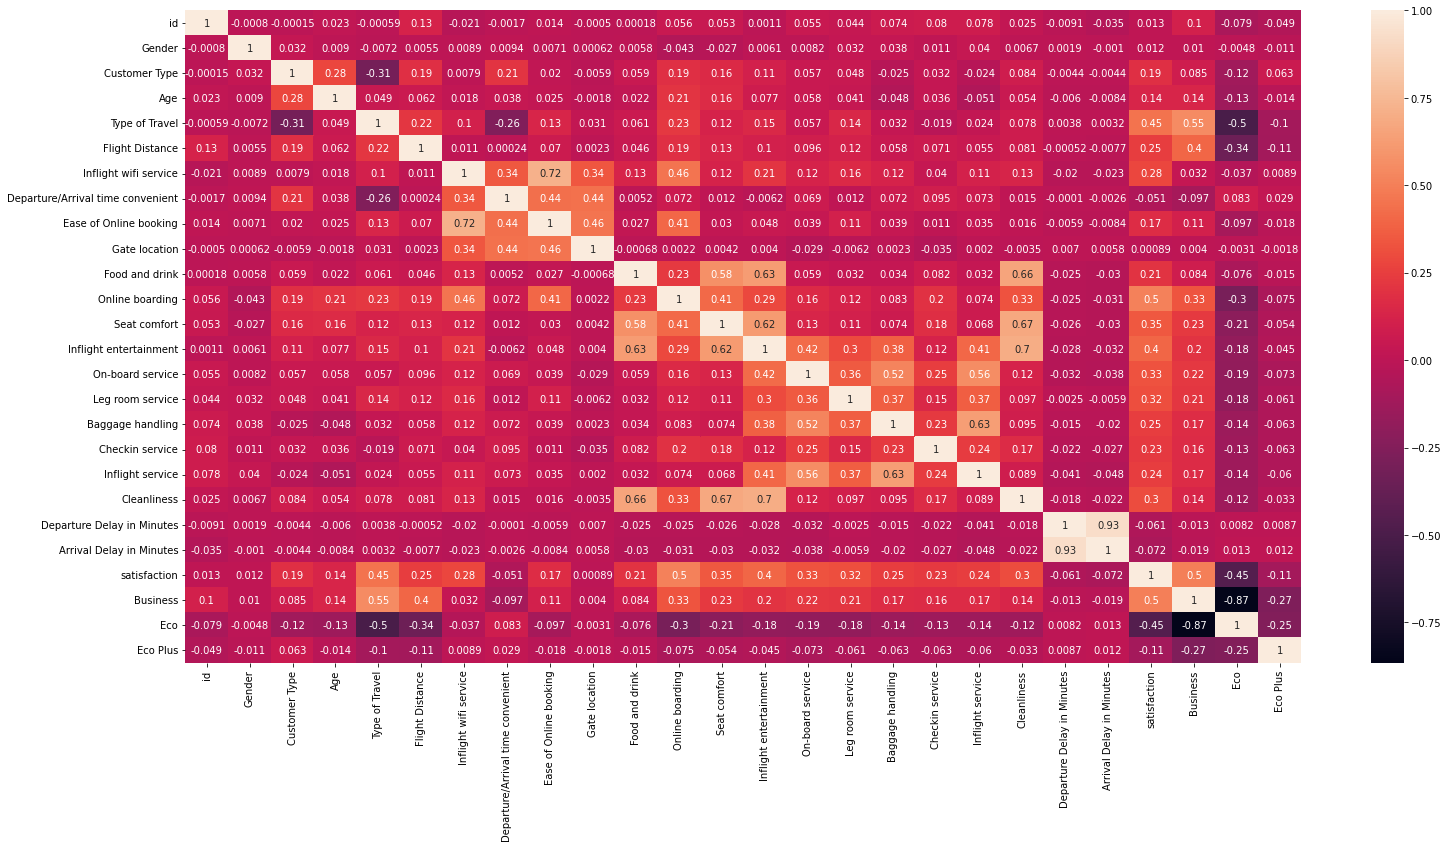

In [ ]:
fig, ax = plt.subplots(figsize = (25,12))
sns.heatmap((data.corr()), annot = True);

## dropping not relevant features

In [ ]:
data.drop(['id', 'Gender', 'Age', 'Type of Travel'], axis = 1, inplace=True) #beri penjelasan kenapa didrop

In [ ]:
data.head()

,Customer Type,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus
0,1,1.0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,0,0,1
1,0,0.0,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,1,0,0
2,1,3.0,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,1,0,0
3,1,1.0,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,1,0,0
4,1,0.0,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,1,0,0


## Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(['satisfaction'], axis=1)
y = data['satisfaction']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.isna().sum()

Customer Type                          0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             204
Business                               0
Eco                                    0
Eco Plus                               0
dtype: int64

In [ ]:
X_test.isna().sum()

Customer Type                         0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             94
Business                              0
Eco                                   0
Eco Plus                              0
dtype: int64

## handle missing values

In [ ]:
arr_delay_mean = X_train['Arrival Delay in Minutes'].mean()

In [ ]:
X_train['Arrival Delay in Minutes'].fillna(arr_delay_mean, inplace=True)
X_test['Arrival Delay in Minutes'].fillna(arr_delay_mean, inplace=True)

In [ ]:
X_train.isna().sum()

Customer Type                        0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Business                             0
Eco                                  0
Eco Plus                             0
dtype: int64

## Handling imbalanced data

In [ ]:
y_train.value_counts()

0    40644
1    31250
Name: satisfaction, dtype: int64

BorderlineSMOTE

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
oversample = BorderlineSMOTE()
X_train_borsmote, y_train_borsmote = oversample.fit_resample(X_train, y_train)

In [ ]:
unique, counts = np.unique(y_train_borsmote, return_counts=True)
dict(zip(unique, counts))

{0: 40644, 1: 40644}

ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN
oversample_adasyn = ADASYN()
X_train_adasyn, y_train_adasyn = oversample_adasyn.fit_resample(X_train, y_train)

In [ ]:
unique, counts = np.unique(y_train_adasyn, return_counts=True)
dict(zip(unique, counts))

{0: 40644, 1: 40292}

# Stage 5 - Modelling

modelling

## Prepare library

In [ ]:
#Make Necessary Import
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn import over_sampling

sns.set(rc={'figure.figsize':(16,8)})
sns.set_style('whitegrid')
sns.color_palette('dark')
plt.style.use('fivethirtyeight')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier



print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.19.5
pandas version :  1.1.5
seaborn version :  0.11.2


In [ ]:
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print('Accuracy (Test Set): %.2f' % accuracy_score(y_test, pred))
    print('Precision (Test Set): %.2f' % precision_score(y_test, pred))
    print('Recall (Test Set): %.2f' % recall_score(y_test, pred))
    print('F1-Score (Test Set): %.2f' % f1_score(y_test, pred))

    fpr, tpr, thresholds = roc_curve(y_test, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print('AUC: %.2f' % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

## Train model - imbalanced

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

## Evaluate model

In [ ]:
from sklearn import metrics

In [ ]:
y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)[:,1]

print(y_pred)
print(probs)

[1 0 1 ... 0 0 0]
[0.54497678 0.18649643 0.97639867 ... 0.39057044 0.22945527 0.43963527]


In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)
auc = metrics.auc(fpr, tpr)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

print('AUC: '+str(round(auc*100,2))+'%')
print('accuracy: '+str(round(accuracy*100,2))+'%')
print('precision: '+str(round(precision*100,2))+'%')
print('recall: '+str(round(recall*100,2))+'%')
print('f1_score: '+str(round(f1_score*100,2))+'%')

AUC: 90.86%
accuracy: 85.08%
precision: 84.15%
recall: 80.75%
f1_score: 82.41%


Performance Log

In [ ]:
performance_log = pd.DataFrame(columns=['experiment','AUC','Accuracy'])
perf = {
    'experiment': 'Logistic Regression',
    'AUC': str(round(auc*100,2))+'%',
    'Accuracy': str(round(accuracy*100,2))+'%',
    'Precision': str(round(precision*100,2))+'%',
    'Recall': str(round(recall*100,2))+'%',
    'F1_Score': str(round(f1_score*100,2))+'%'
}
performance_log = performance_log.append(perf, ignore_index=True)
performance_log

,experiment,AUC,Accuracy,F1_Score,Precision,Recall
0,Logistic Regression,90.86%,85.08%,82.41%,84.15%,80.75%


## Train model - balanced

In [ ]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train_borsmote, y_train_borsmote)

LogisticRegression(random_state=42)

## Evaluate model - balanced

In [ ]:
y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)[:,1]

print(y_pred)
print(probs)

[1 0 1 ... 0 0 0]
[0.69010716 0.29907145 0.96951554 ... 0.46636055 0.34040153 0.49615537]


In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)
auc = metrics.auc(fpr, tpr)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

print('AUC: '+str(round(auc*100,2))+'%')
print('accuracy: '+str(round(accuracy*100,2))+'%')
print('precision: '+str(round(precision*100,2))+'%')
print('recall: '+str(round(recall*100,2))+'%')
print('f1_score: '+str(round(f1_score*100,2))+'%')

AUC: 90.71%
accuracy: 83.71%
precision: 78.91%
recall: 85.12%
f1_score: 81.89%


In [ ]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)[:,1]

print(y_pred)
print(probs)

[1 0 1 ... 0 0 0]
[0.70524295 0.3078569  0.96715151 ... 0.45528045 0.3473843  0.47295718]


In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)
auc = metrics.auc(fpr, tpr)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

print('AUC: '+str(round(auc*100,2))+'%')
print('accuracy: '+str(round(accuracy*100,2))+'%')
print('precision: '+str(round(precision*100,2))+'%')
print('recall: '+str(round(recall*100,2))+'%')
print('f1_score: '+str(round(f1_score*100,2))+'%')

AUC: 90.81%
accuracy: 84.03%
precision: 79.46%
recall: 85.09%
f1_score: 82.18%


## Modelling experiment

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import metrics

In [ ]:
performance_log = pd.DataFrame(columns=['experiment','AUC','Accuracy'])

Modelling without balancing data

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(),
    'Xgboost': XGBClassifier(eval_metric='logloss')
}

for model_name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)[:,1]

    fpr, tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)

    perf = {
    'experiment': model_name,
    'AUC': str(round(auc*100,2))+'%',
    'Accuracy': str(round(accuracy*100,2))+'%',
    'Precision': str(round(precision*100,2))+'%',
    'Recall': str(round(recall*100,2))+'%',
    'F1_Score': str(round(f1_score*100,2))+'%'
    }

    performance_log = performance_log.append(perf, ignore_index=True)

In [ ]:
performance_log

,experiment,AUC,Accuracy,F1_Score,Precision,Recall
0,Logistic Regression,90.86%,85.08%,82.41%,84.15%,80.75%
1,Decision Tree,92.83%,92.88%,91.83%,91.27%,92.39%
2,Xgboost,97.97%,92.68%,91.38%,93.24%,89.6%


##Modelling with balancing data

BorderlineSMOTE

In [ ]:
models = {
    'Logistic Regression - BorSMOTE': LogisticRegression(random_state=42),
    'Decision Tree - BorSMOTE': DecisionTreeClassifier(),
    'Xgboost - BorSMOTE': XGBClassifier(eval_metric='logloss')
}

for model_name, clf in models.items():
    clf.fit(X_train_borsmote, y_train_borsmote)
    y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)[:,1]

    fpr, tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)

    perf = {
    'experiment': model_name,
    'AUC': str(round(auc*100,2))+'%',
    'Accuracy': str(round(accuracy*100,2))+'%',
    'Precision': str(round(precision*100,2))+'%',
    'Recall': str(round(recall*100,2))+'%',
    'F1_Score': str(round(f1_score*100,2))+'%'
    }

    performance_log = performance_log.append(perf, ignore_index=True)

In [ ]:
performance_log

,experiment,AUC,Accuracy,F1_Score,Precision,Recall
0,Logistic Regression,90.86%,85.08%,82.41%,84.15%,80.75%
1,Decision Tree,92.83%,92.88%,91.83%,91.27%,92.39%
2,Xgboost,97.97%,92.68%,91.38%,93.24%,89.6%
3,Logistic Regression - BorSMOTE,90.71%,83.71%,81.89%,78.91%,85.12%
4,Decision Tree - BorSMOTE,92.4%,92.4%,91.32%,90.3%,92.38%
5,Xgboost - BorSMOTE,97.82%,91.88%,90.96%,87.86%,94.28%


ADASYN

In [ ]:
models = {
    'Logistic Regression - ADASYN': LogisticRegression(random_state=42),
    'Decision Tree - ADASYN': DecisionTreeClassifier(),
    'Xgboost - ADASYN': XGBClassifier(eval_metric='logloss')
}

for model_name, clf in models.items():
    clf.fit(X_train_adasyn, y_train_adasyn)
    y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)[:,1]

    fpr, tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)

    perf = {
    'experiment': model_name,
    'AUC': str(round(auc*100,2))+'%',
    'Accuracy': str(round(accuracy*100,2))+'%',
    'Precision': str(round(precision*100,2))+'%',
    'Recall': str(round(recall*100,2))+'%',
    'F1_Score': str(round(f1_score*100,2))+'%'
    }

    performance_log = performance_log.append(perf, ignore_index=True)

In [ ]:
performance_log

,experiment,AUC,Accuracy,F1_Score,Precision,Recall
0,Logistic Regression,90.86%,85.08%,82.41%,84.15%,80.75%
1,Decision Tree,92.83%,92.88%,91.83%,91.27%,92.39%
2,Xgboost,97.97%,92.68%,91.38%,93.24%,89.6%
3,Logistic Regression - BorSMOTE,90.71%,83.71%,81.89%,78.91%,85.12%
4,Decision Tree - BorSMOTE,92.4%,92.4%,91.32%,90.3%,92.38%
5,Xgboost - BorSMOTE,97.82%,91.88%,90.96%,87.86%,94.28%
6,Logistic Regression - ADASYN,90.81%,84.03%,82.18%,79.46%,85.09%
7,Decision Tree - ADASYN,92.46%,92.49%,91.4%,90.59%,92.22%
8,Xgboost - ADASYN,97.76%,91.84%,90.88%,88.06%,93.88%


After we finding out that XGBoost has the highest recall and AUC score, we try to use random_state=42 and run the XGBoost once more to see whether the XGBoost performance will stay the same or not after applying random state

In [ ]:
clf = XGBClassifier(random_state=42, eval_metric='logloss')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)[:,1]

print('Model with Random State : 42')

fpr, tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)
auc = metrics.auc(fpr, tpr)
print('AUC: '+str(round(auc*100,2))+'%')

accuracy = metrics.accuracy_score(y_test, y_pred)
print('accuracy: '+str(round(accuracy*100,2))+'%')

precision = metrics.precision_score(y_test, y_pred)
print('precision: '+str(round(precision*100,2))+'%')

recall = metrics.recall_score(y_test, y_pred)
print('recall: '+str(round(recall*100,2))+'%')

f1_score = metrics.f1_score(y_test, y_pred)
print('f1_score: '+str(round(f1_score*100,2))+'%')

Model with Random State : 42
AUC: 97.97%
accuracy: 92.68%
precision: 93.24%
recall: 89.6%
f1_score: 91.38%


In [ ]:
# perf = {
#     'experiment': 'Xgboost',
#     'AUC': str(round(auc*100,2))+'%',
#     'Accuracy': str(round(accuracy*100,2))+'%',
#     'Precision': str(round(precision*100,2))+'%',
#     'Recall': str(round(recall*100,2))+'%',
#     'F1_Score': str(round(f1_score*100,2))+'%'
# }
# performance_log = performance_log.append(perf, ignore_index=True)
# performance_log

Hyperparameter on XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

In [ ]:
#List of Hyper-parameters will be tested
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

In [ ]:
hyperparameters

{'alpha': [0.0,
  0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6000000000000001,
  0.7000000000000001,
  0.8,
  0.9,
  1.0],
 'colsample_bytree': [0.0,
  0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6000000000000001,
  0.7000000000000001,
  0.8,
  0.9,
  1.0],
 'eta': [0.0,
  0.010101010101010102,
  0.020202020202020204,
  0.030303030303030304,
  0.04040404040404041,
  0.05050505050505051,
  0.06060606060606061,
  0.07070707070707072,
  0.08080808080808081,
  0.09090909090909091,
  0.10101010101010102,
  0.11111111111111112,
  0.12121212121212122,
  0.13131313131313133,
  0.14141414141414144,
  0.15151515151515152,
  0.16161616161616163,
  0.17171717171717174,
  0.18181818181818182,
  0.19191919191919193,
  0.20202020202020204,
  0.21212121212121213,
  0.22222222222222224,
  0.23232323232323235,
  0.24242424242424243,
  0.25252525252525254,
  0.26262626262626265,
  0.27272727272727276,
  0.2828282828282829,
  0.29292929292929293,
  0.30303030303030304,
  0.3131313131313

In [ ]:
# Init
clf = XGBClassifier(random_state=42, eval_metric='logloss')
clf_tuned = RandomizedSearchCV(clf, hyperparameters, cv=3, random_state=42, scoring='f1')
clf_tuned.fit(X_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(eval_metric='logloss',
                                           random_state=42),
                   param_distributions={'alpha': [0.0, 0.1, 0.2,
                                                  0.30000000000000004, 0.4, 0.5,
                                                  0.6000000000000001,
                                                  0.7000000000000001, 0.8, 0.9,
                                                  1.0],
                                        'colsample_bytree': [0.0, 0.1, 0.2,
                                                             0.30000000000000004,
                                                             0.4, 0.5,
                                                             0.6000000000000001,
                                                             0.7000000000000001,
                                                             0.8, 0.9, 1.0],
                            

In [ ]:
# Predict & Evaluation
y_pred = clf_tuned.predict(X_test)
probs = clf_tuned.predict_proba(X_test)[:,1]

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)
auc = metrics.auc(fpr, tpr)
print('AUC: '+str(round(auc*100,2))+'%')

accuracy = metrics.accuracy_score(y_test, y_pred)
print('accuracy: '+str(round(accuracy*100,2))+'%')

precision = metrics.precision_score(y_test, y_pred)
print('precision: '+str(round(precision*100,2))+'%')

recall = metrics.recall_score(y_test, y_pred)
print('recall: '+str(round(recall*100,2))+'%')

f1_score = metrics.f1_score(y_test, y_pred)
print('f1_score: '+str(round(f1_score*100,2))+'%')

print('\n')

AUC: 99.26%
accuracy: 95.46%
precision: 95.87%
recall: 93.54%
f1_score: 94.69%




In [ ]:
#Check the best Hyperparameters
show_best_hyperparameter(clf_tuned.best_estimator_, hyperparameters)

Best max_depth: 50
Best min_child_weight: 4
Best gamma: 1.0
Best tree_method: approx
Best colsample_bytree: 0.7000000000000001
Best eta: 0.31313131313131315
Best lambda: 0.6000000000000001
Best alpha: 0.6000000000000001


In [ ]:
perf = {
    'experiment': 'Xgboost - Hyperparameter Tunning',
    'AUC': str(round(auc*100,2))+'%',
    'Accuracy': str(round(accuracy*100,2))+'%',
    'Precision': str(round(precision*100,2))+'%',
    'Recall': str(round(recall*100,2))+'%',
    'F1_Score': str(round(f1_score*100,2))+'%'
}
performance_log = performance_log.append(perf, ignore_index=True)
performance_log

,experiment,AUC,Accuracy,F1_Score,Precision,Recall
0,Logistic Regression,90.86%,85.08%,82.41%,84.15%,80.75%
1,Decision Tree,92.9%,92.95%,91.9%,91.42%,92.4%
2,Xgboost,97.97%,92.68%,91.38%,93.24%,89.6%
3,Logistic Regression - BorSMOTE,90.78%,83.74%,81.98%,78.76%,85.49%
4,Decision Tree - BorSMOTE,92.39%,92.4%,91.31%,90.39%,92.26%
5,Xgboost - BorSMOTE,97.8%,91.71%,90.82%,87.28%,94.65%
6,Logistic Regression - ADASYN,90.79%,83.95%,82.12%,79.3%,85.16%
7,Decision Tree - ADASYN,92.51%,92.51%,91.44%,90.47%,92.43%
8,Xgboost - ADASYN,97.79%,91.83%,90.86%,88.16%,93.72%
9,Xgboost - Hyperparameter Tunning,99.26%,95.46%,94.69%,95.87%,93.54%


## Evaluation

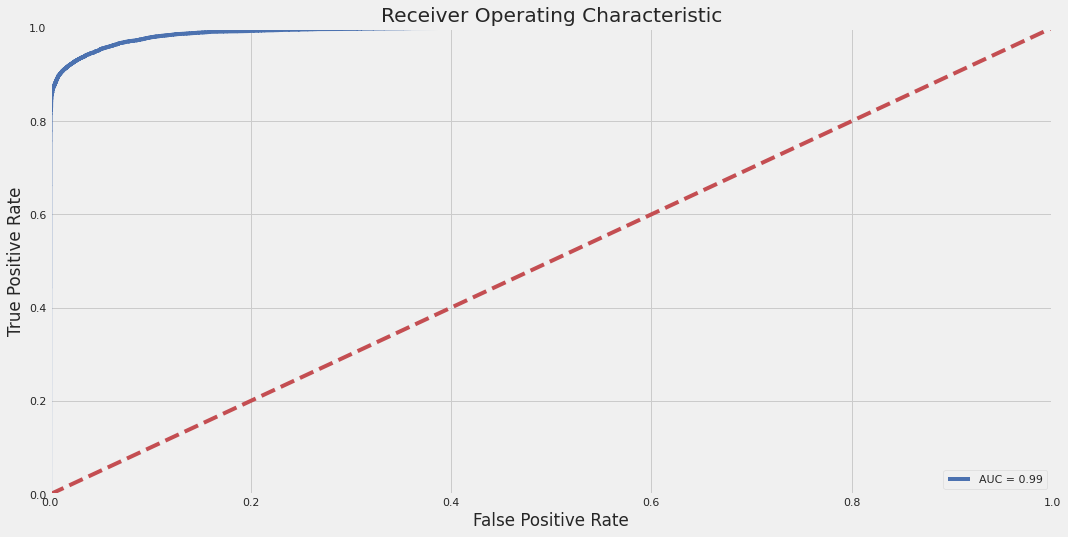

In [ ]:
#AUC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##Feature importance

In [ ]:
clf_tuned.best_estimator_.feature_importances_

array([0.04064405, 0.00501954, 0.1553969 , 0.01361322, 0.01978823,
       0.01332472, 0.00949761, 0.16294606, 0.00850521, 0.0401173 ,
       0.00694458, 0.01660462, 0.00807044, 0.00889351, 0.00807638,
       0.01269058, 0.00314397, 0.00456564, 0.39825067, 0.04753842,
       0.01636832], dtype=float32)

Text(0.5, 1.0, 'Feature Importance Score')

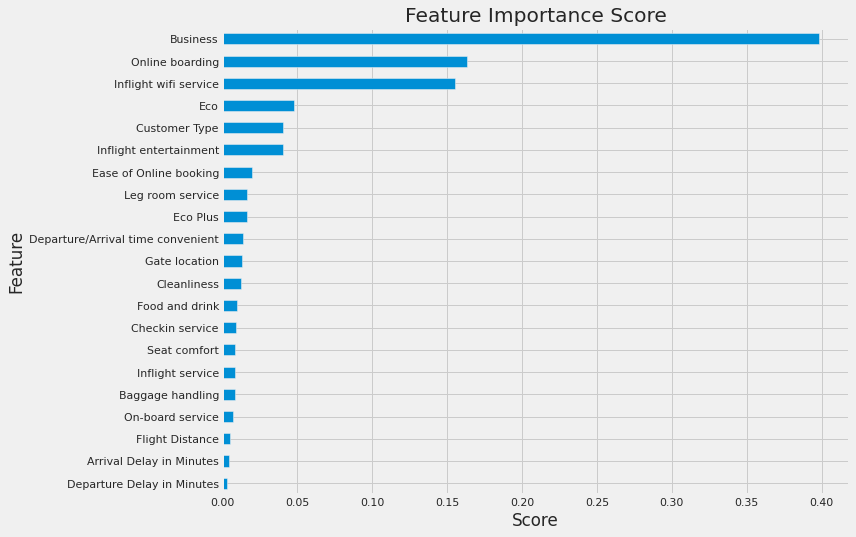

In [ ]:
feat_importances = pd.Series(clf_tuned.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importance Score')

Performance Summary

In [ ]:
performance_log

,experiment,AUC,Accuracy,F1_Score,Precision,Recall
0,Logistic Regression,90.86%,85.08%,82.41%,84.15%,80.75%
1,Decision Tree,92.9%,92.95%,91.9%,91.42%,92.4%
2,Xgboost,97.97%,92.68%,91.38%,93.24%,89.6%
3,Logistic Regression - BorSMOTE,90.78%,83.74%,81.98%,78.76%,85.49%
4,Decision Tree - BorSMOTE,92.39%,92.4%,91.31%,90.39%,92.26%
5,Xgboost - BorSMOTE,97.8%,91.71%,90.82%,87.28%,94.65%
6,Logistic Regression - ADASYN,90.79%,83.95%,82.12%,79.3%,85.16%
7,Decision Tree - ADASYN,92.51%,92.51%,91.44%,90.47%,92.43%
8,Xgboost - ADASYN,97.79%,91.83%,90.86%,88.16%,93.72%
9,Xgboost - Hyperparameter Tunning,99.26%,95.46%,94.69%,95.87%,93.54%


Checking overfitting/underfitting

In [ ]:
print('train accuracy : ', str(round(clf_tuned.score(X_train, y_train),2)*100), '%')
print('test accuracy : ', str(round(clf_tuned.score(X_test, y_test),2)*100), '%')

train accuracy :  99.0 %
test accuracy :  95.0 %


In [ ]:
print('train error : ', str(round(clf_tuned.error_score(X_train, y_train),2)*100), '%')
print('test error : ', str(round(clf_tuned.error_score(X_test, y_test),2)*100), '%')

TypeError: ignored

In [ ]:
?clf_tuned

In [ ]:
clf_tuned.scoring

'f1'

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('accuracy: '+str(round(accuracy*100,2))+'%')

precision = metrics.precision_score(y_test, y_pred)
print('precision: '+str(round(precision*100,2))+'%')

recall = metrics.recall_score(y_test, y_pred)
print('recall: '+str(round(recall*100,2))+'%')

f1_score = metrics.f1_score(y_test, y_pred)
print('f1_score: '+str(round(f1_score*100,2))+'%')

print('\n')